In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

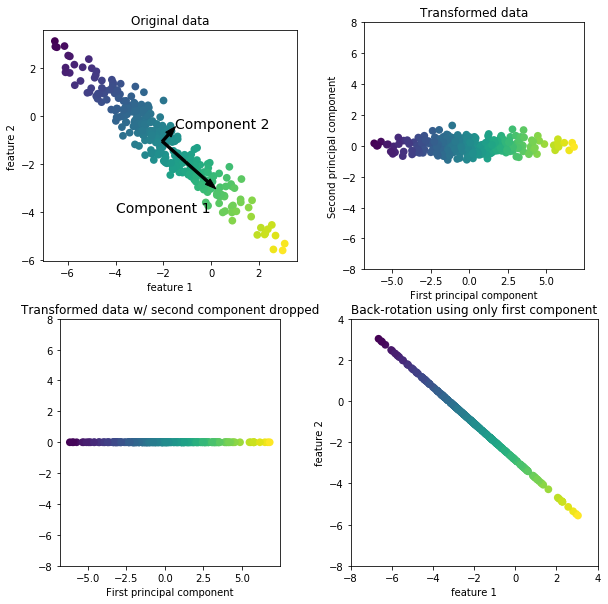

In [3]:
# PCA - method to rotate dataset such that the rotated features are statistically uncorrelated

# Component 1 -  direction of maximum variance
# Component 1 contains the most information
# In C1 direction features are most correlated with each other

# Component 2 - direction that contains the most information and is orthogonal to the first direction

mglearn.plots.plot_pca_illustration()

In [4]:
# PCA for visualization purposes 

cancer = load_breast_cancer()

# Perform scaling (0-mean and 1-variance)

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
# Create PCA object 
# Specify number of principal components to keep
pca = PCA(n_components=2)

# Fit PCA --> find the principal components 
pca.fit(X_scaled)

# Transform --> apply rotation and dimensionality reduction
X_pca = pca.transform(X_scaled)

# Check shapes before and after transformation
print('Original shape: ', X_scaled.shape)
print('Reduced shape: ', X_pca.shape)

Original shape:  (569, 30)
Reduced shape:  (569, 2)


Text(0, 0.5, 'Second principal component')

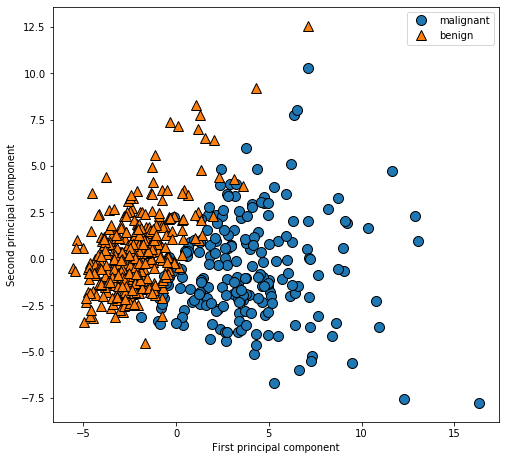

In [6]:
# Plot first 2 principal components (2-dim. space)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [7]:
# Discover principal components

print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

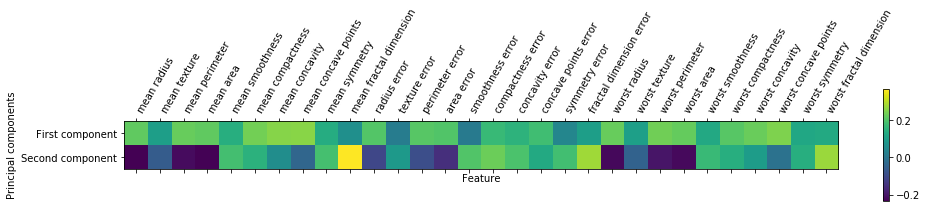

In [8]:
# Visualize coefficients of original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [9]:
# PCA for feature extraction purposes

# Load dataset with images

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape    # (87, 65) 

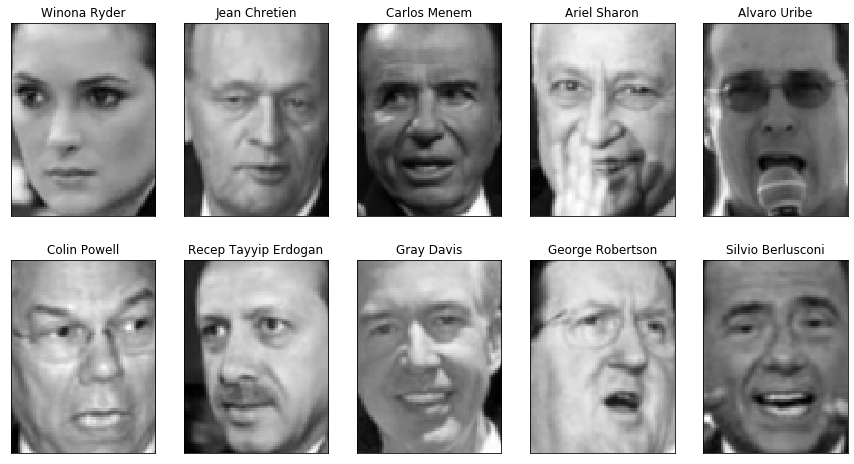

In [10]:
# Samples in the dataset

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [11]:
# Samples * size of each image
print("people.images.shape: {}".format(people.images.shape))

# Number of unique people
print("Number of classes: {}".format(len(people.target_names)))

# Number of people
print("Number of samples: {}".format(len(people.target)))

people.images.shape: (3023, 87, 65)
Number of classes: 62
Number of samples: 3023


In [12]:
# count how often each target appears

counts = np.bincount(people.target)

In [13]:
# print counts next to target names

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [14]:
# Take 50 images of each person (to make data less skewed)
 
mask = np.zeros(people.target.shape, dtype = np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [15]:
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [17]:
# Use kNN with 1 nearest neighbor to find the most
# similar face image to the classified face

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

# Distances are computed in pixel space 

Test set score of 1-nn: 0.23


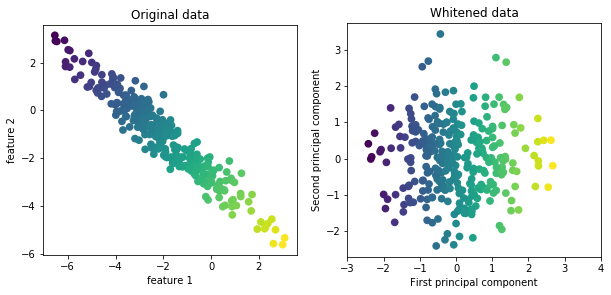

In [18]:
# Whitening - rescaling the principal components to have the same scale
# like StandardScaler after transformation

mglearn.plots.plot_pca_whitening()

In [19]:
# Use PCA to change representation (use distances along principal components)

# Fit PCA --> find the first 100 principal components

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

In [20]:
# Transfrom train and test data
# --> apply rotation, dimensionality reduction + scaling (whiten option)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

# New features - first 100 principal components

X_train_pca.shape: (1547, 100)


In [21]:
# kNN to find the most similar face image to the classified face with new representation

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

# Improving accuracy --> better representation

Test set accuracy: 0.31


In [22]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


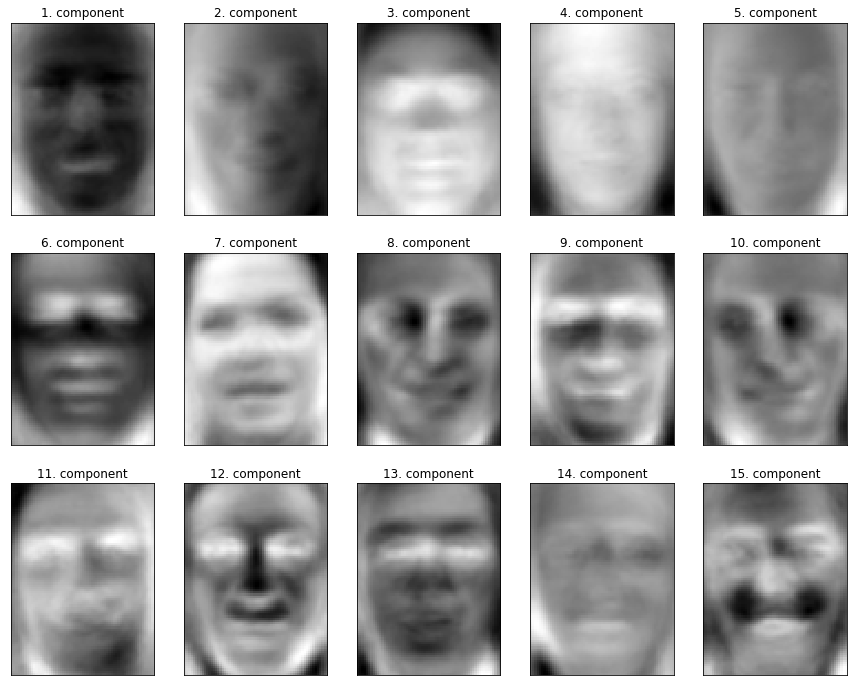

In [24]:
# Look at the principal components

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

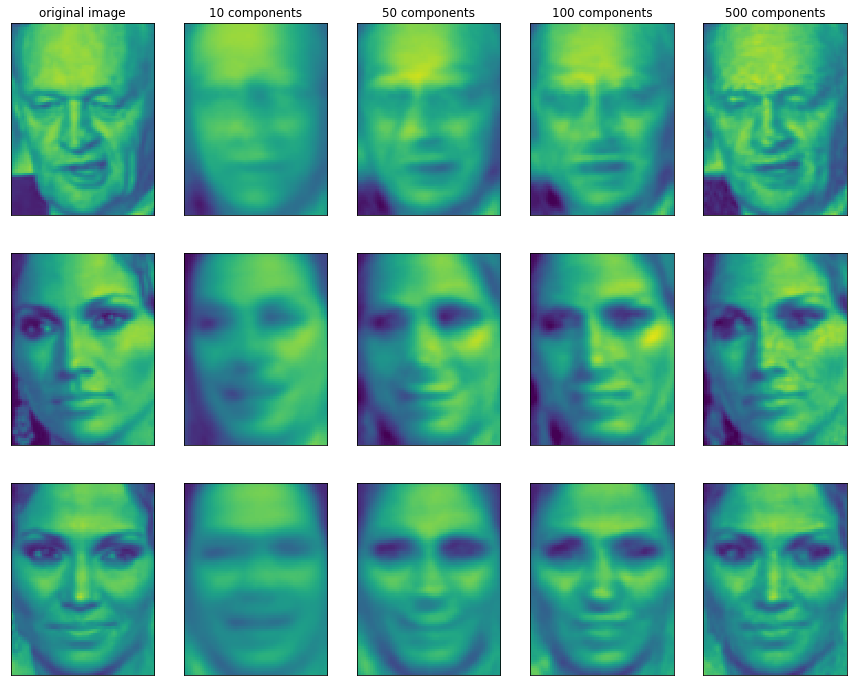

In [28]:
# Visualize reconstruction of original data using different subsets of principal components

mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

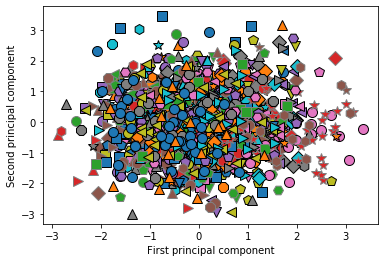

In [29]:
# Visualize original data with scatter plot using first 2 principal components

mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# This representation doesn't capture necessary information to perform classification